In [1]:
import pyemma
import pickle
import os
import glob
import torch

import mdtraj as md
import numpy as np
import nglview as nv
import matplotlib.pyplot as plt
import numpy as np

np.bool = np.bool_

from tqdm import tqdm
from matplotlib.colors import LogNorm
from itertools import combinations

blue = (70 / 255, 110 / 255, 250 / 255)
green = (100 / 255, 170 / 255, 120 / 255)

In [2]:
molecule = "NTL9"
simulation_idx = 0
base_dir = f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-protein"
save_dir = f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein"
pdb_path = f"/home/shpark/prj-mlcv/lib/DESRES/data/{molecule}/{molecule}_from_mae.pdb"

In [3]:
name2letter = {
	"ALA": "A",
	"CYS": "C",
	"ASP": "D",
	"GLU": "E",
	"PHE": "F",
	"GLY": "G",
	"HIS": "H",
	"ILE": "I",
	"LYS": "K",
	"LEU": "L",
	"MET": "M",
	"ASN": "N",
	"PRO": "P",
	"GLN": "Q",
	"ARG": "R",
	"SER": "S",
	"THR": "T",
	"VAL": "V",
	"TRP": "W",
	"TYR": "Y",
	"NLE": "X",
}

pdb_traj = md.load_pdb(pdb_path) 
residue_names = [residue.name for residue in pdb_traj.topology.residues]
one_letter_str = ""
for idx, names in enumerate(residue_names):
    # print(f"Letter {idx}: {name2letter[names]}")
    one_letter_str += name2letter[names]
print(one_letter_str)
print(len(one_letter_str))

MKVIFLKDVKGMGKKGEIKNVADGYANNFLFKQGLAIEA
39


In [4]:
# CA atom index
ca_atoms = [atom for atom in pdb_traj.topology.atoms if atom.name == "CA"]
ca_indices = [atom.index for atom in ca_atoms]

cnt = 1
for i in range(len(ca_indices)):
    for j in range(i+1, len(ca_indices)):
        print(f"d{cnt}: DISTANCE ATOMS={ca_indices[i]+1},{ca_indices[j]+1}")
        cnt += 1

print("ARG=" + ",".join(f"d{i+1}" for i in range(cnt)))

d1: DISTANCE ATOMS=2,21
d2: DISTANCE ATOMS=2,43
d3: DISTANCE ATOMS=2,59
d4: DISTANCE ATOMS=2,78
d5: DISTANCE ATOMS=2,98
d6: DISTANCE ATOMS=2,117
d7: DISTANCE ATOMS=2,139
d8: DISTANCE ATOMS=2,151
d9: DISTANCE ATOMS=2,167
d10: DISTANCE ATOMS=2,189
d11: DISTANCE ATOMS=2,196
d12: DISTANCE ATOMS=2,213
d13: DISTANCE ATOMS=2,220
d14: DISTANCE ATOMS=2,242
d15: DISTANCE ATOMS=2,264
d16: DISTANCE ATOMS=2,271
d17: DISTANCE ATOMS=2,286
d18: DISTANCE ATOMS=2,305
d19: DISTANCE ATOMS=2,327
d20: DISTANCE ATOMS=2,341
d21: DISTANCE ATOMS=2,357
d22: DISTANCE ATOMS=2,367
d23: DISTANCE ATOMS=2,379
d24: DISTANCE ATOMS=2,386
d25: DISTANCE ATOMS=2,407
d26: DISTANCE ATOMS=2,417
d27: DISTANCE ATOMS=2,431
d28: DISTANCE ATOMS=2,445
d29: DISTANCE ATOMS=2,465
d30: DISTANCE ATOMS=2,484
d31: DISTANCE ATOMS=2,504
d32: DISTANCE ATOMS=2,526
d33: DISTANCE ATOMS=2,543
d34: DISTANCE ATOMS=2,550
d35: DISTANCE ATOMS=2,569
d36: DISTANCE ATOMS=2,579
d37: DISTANCE ATOMS=2,598
d38: DISTANCE ATOMS=2,613
d39: DISTANCE ATOMS=21,43


# Visualization

## Alignment

In [ ]:
# Check .dcd files in the simulation directory
dcd_pattern = f"{base_dir}/{molecule}-{simulation_idx}-protein-*-aligned.dcd"
dcd_files = glob.glob(dcd_pattern)
num_files = len(dcd_files)
print(f"Found {num_files} .dcd files in {base_dir}")
print(f"Pattern used: {dcd_pattern}")

file_indices = []
for file_path in dcd_files:
    filename = os.path.basename(file_path)
    index_part = filename.split('-')[-2].replace('.dcd', '')
    if index_part.isdigit():
        file_indices.append(int(index_part))

file_indices.sort()
print(f"File indices range: {min(file_indices)} to {max(file_indices)}")
print(f"Total files to load: {len(file_indices)}")

NameError: name 'base_dir' is not defined

In [ ]:
# Load trajectories 
atom_mapping = np.array([1, 2, 3, 4, 5, 6, 7, 8, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 9, 10, 11, 12, 13, 14, 15, 16, 17, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 18, 19, 20, 21, 22, 23, 24, 323, 324, 325, 326, 327, 328, 329, 330, 331, 25, 26, 27, 28, 29, 30, 31, 32, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 343, 344, 345, 346, 347, 348, 349, 350, 351, 44, 45, 46, 47, 48, 49, 50, 51, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 52, 53, 54, 55, 56, 57, 58, 59, 60, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 61, 62, 63, 64, 65, 66, 67, 68, 376, 377, 378, 379, 69, 70, 71, 72, 73, 74, 75, 380, 381, 382, 383, 384, 385, 386, 387, 388, 76, 77, 78, 79, 80, 81, 82, 83, 84, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 85, 86, 87, 88, 402, 403, 404, 89, 90, 91, 92, 93, 94, 95, 96, 405, 406, 407, 408, 409, 410, 411, 412, 413, 97, 98, 99, 100, 414, 415, 416, 101, 102, 103, 104, 105, 106, 107, 108, 109, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 110, 111, 112, 113, 114, 115, 116, 117, 118, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 119, 120, 121, 122, 443, 444, 445, 123, 124, 125, 126, 127, 128, 129, 130, 131, 446, 447, 448, 449, 450, 451, 132, 133, 134, 135, 136, 137, 138, 139, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 140, 141, 142, 143, 144, 145, 146, 147, 148, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 149, 150, 151, 152, 153, 154, 155, 156, 476, 477, 478, 479, 480, 481, 157, 158, 159, 160, 161, 162, 163, 482, 483, 484, 485, 486, 487, 488, 489, 490, 164, 165, 166, 167, 168, 491, 492, 493, 494, 495, 169, 170, 171, 172, 173, 174, 175, 176, 496, 497, 498, 499, 177, 178, 179, 180, 500, 501, 502, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 503, 504, 505, 506, 507, 508, 509, 510, 511, 193, 194, 195, 196, 197, 512, 513, 514, 515, 516, 198, 199, 200, 201, 202, 203, 204, 205, 517, 518, 519, 520, 521, 522, 206, 207, 208, 209, 210, 211, 212, 213, 523, 524, 525, 526, 527, 528, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 529, 530, 531, 532, 533, 534, 535, 536, 537, 225, 226, 227, 228, 229, 230, 231, 232, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 549, 550, 551, 552, 553, 554, 555, 556, 557, 244, 245, 246, 247, 248, 249, 250, 251, 252, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 253, 254, 255, 256, 257, 258, 259, 260, 261, 571, 572, 573, 574, 575, 576, 577, 578, 262, 263, 264, 265, 579, 580, 581, 266, 267, 268, 269, 270, 271, 272, 273, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 274, 275, 276, 277, 278, 593, 594, 595, 596, 597, 279, 280, 281, 282, 283, 284, 285, 286, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 287, 288, 289, 290, 291, 292, 293, 294, 295, 609, 610, 611, 612, 613, 614, 296, 297, 620, 621, 298, 622, 615, 616, 617, 618, 619, 623, 624])
for i in tqdm(
    file_indices,
    desc="Aligning trajectories"
):
    file_idx = f"{i:03d}"
    file_path = f"{base_dir}/{molecule}-{simulation_idx}-protein-{file_idx}.dcd"
    if os.path.exists(file_path):
        traj = md.load_dcd(file_path, top=pdb_path)
        traj.xyz = traj.xyz[:, atom_mapping - 1]
        # traj.save_dcd(f"{base_dir}/{molecule}-{simulation_idx}-protein-{file_idx}-aligned.dcd")

Loading trajectories: 100%|██████████| 557/557 [03:22<00:00,  2.75it/s]


## Trajectory

In [5]:
# PDB
pdb_traj = md.load_pdb(pdb_path)
pdb_view = nv.show_mdtraj(
    pdb_traj,
    height="400px",
    width="400px"
)
pdb_view.add_representation("licorice", selection="protein")

print(pdb_traj)
pdb_view

<mdtraj.Trajectory with 1 frames, 624 atoms, 39 residues, and unitcells>


NGLWidget()

In [7]:
sample_file_path = f"{base_dir}/{molecule}-{simulation_idx}-protein-000-aligned.dcd"
sample_traj = md.load_dcd(sample_file_path, top=pdb_path)
print(sample_traj)

sample_traj.center_coordinates()
sample_view = nv.show_mdtraj(
    sample_traj,
    height="400px",
    width="400px"
)
sample_view.add_representation("licorice", selection="protein")
sample_view

<mdtraj.Trajectory with 10000 frames, 624 atoms, 39 residues, and unitcells>


NGLWidget(max_frame=9999)

In [8]:
# Load trajectories 
traj_list = []
for i in tqdm(
    file_indices,
    desc="Loading trajectories"
):
    file_idx = f"{i:03d}"
    file_path = f"{base_dir}/{molecule}-{simulation_idx}-protein-{file_idx}-aligned.dcd"
    if os.path.exists(file_path):
        traj = md.load_dcd(file_path, top=pdb_path)
        traj_list.append(traj)
    else:
        print(f"Warning: File not found: {file_path}")

print(f"Successfully loaded {len(traj_list)} trajectory files")
all_traj = md.join(traj_list)

Loading trajectories: 100%|██████████| 557/557 [00:48<00:00, 11.40it/s]


Successfully loaded 557 trajectory files


In [15]:
print(all_traj)
all_traj.center_coordinates()
view = nv.show_mdtraj(
    all_traj,
	height="400px",
    width="400px"
)
view.add_representation("licorice", selection="protein")
print(f"Total frames: {all_traj.n_frames}")
view

<mdtraj.Trajectory with 5560828 frames, 624 atoms, 39 residues, and unitcells>
Total frames: 5560828


NGLWidget(max_frame=5560827)

In [64]:
view.frame = 1

# Descriptors

In [ ]:
ca_resid_pair = np.array(
	[(a.index, b.index) for a, b in combinations(list(all_traj.topology.residues), 2)]
)

# ca_pair_contacts, resid_pairs = md.compute_contacts(
# 	all_traj, scheme="ca", contacts=ca_resid_pair, periodic=False
# )
# torch.save(
#     torch.from_numpy(ca_pair_contacts),
#     f"../DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-cad.pt"
# )

ca_pair_contacts = torch.load(
	f"../DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-cad.pt"
).numpy()
print(ca_pair_contacts.shape)
print(ca_pair_contacts.mean())

NameError: name 'all_traj' is not defined

In [ ]:
# exp = 2
# ca_pair_distances_swtich = (1 - (np.power(ca_pair_contacts, exp) / 0.8)) / (1 - (np.power(ca_pair_contacts, exp) / 0.8))
# torch.save(
#     torch.from_numpy(ca_pair_distances_swtich),
#     f"../DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-cad-switch.pt"
# )

ca_pair_distances_swtich = torch.load(
	f"../DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-cad-switch.pt"
).numpy()
print(ca_pair_distances_swtich.shape)
print(ca_pair_distances_swtich.mean())

In [ ]:
# xyz = all_traj.xyz
# torch.save(
#     torch.from_numpy(xyz),
#     f"../DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-pos.pt"
# )

xyz = torch.load(f"../DESRES-Trajectory_{molecule}-{simulation_idx}-protein/{molecule}-{simulation_idx}-pos.pt").numpy()
print(xyz.shape)

# TICA

In [13]:
def cad2switch(
    cad,
    cutoff: float = 0.8
) -> np.ndarray:
	if type(cad) == torch.Tensor:
		cad = cad.numpy()
	return (1 - np.power(cad / cutoff, 6)) / (1 - np.power(cad / cutoff, 12))

In [ ]:
# TICA with pair distances

for lag in (10, 100, 1000):
	tica_coord_path = f"../data/{molecule}/{molecule}_tica_coord_lag{lag}.npy"
	if os.path.exists(tica_coord_path):
		tica_data = np.load(tica_coord_path)
	else:
		tica_obj = pyemma.coordinates.tica(ca_pair_contacts, lag=lag, dim=2)
		tica_data = tica_obj.get_output()[0]
		np.save(tica_coord_path, tica_data)
	x = tica_data[:, 0]
	y = tica_data[:, 1]

	# Plot
	fig = plt.figure(figsize=(6, 6))
	ax = fig.add_subplot(111)
	ax.hist2d(x, y, bins=100, norm=LogNorm())
	ax.set_xlabel("TIC 1")
	ax.set_ylabel("TIC 2")
	plt.title(f"TICA with pair distances, lag={lag}")
	plt.savefig(f'../data/{molecule}/{molecule}_tica_model_lag{lag}.png')
	plt.show()
	plt.close()

	tica_model_path = f"../data/{molecule}/{molecule}_tica_model_lag{lag}.pkl"
	if not os.path.exists(tica_model_path):
		with open(tica_model_path, 'wb') as f:
			pickle.dump(tica_obj, f)

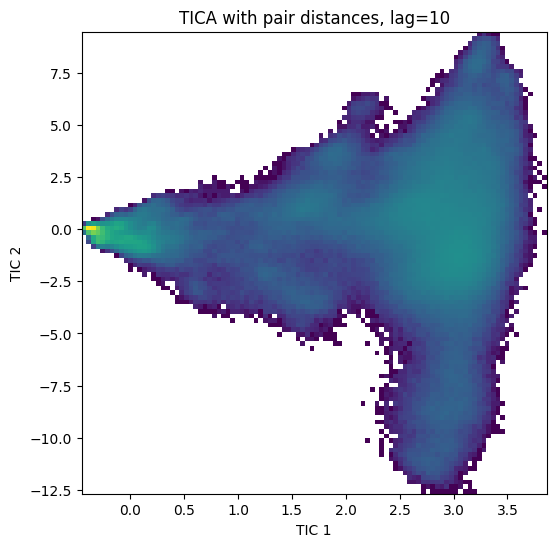

Loading trajectories: 100%|██████████| 557/557 [01:34<00:00,  5.92it/s]


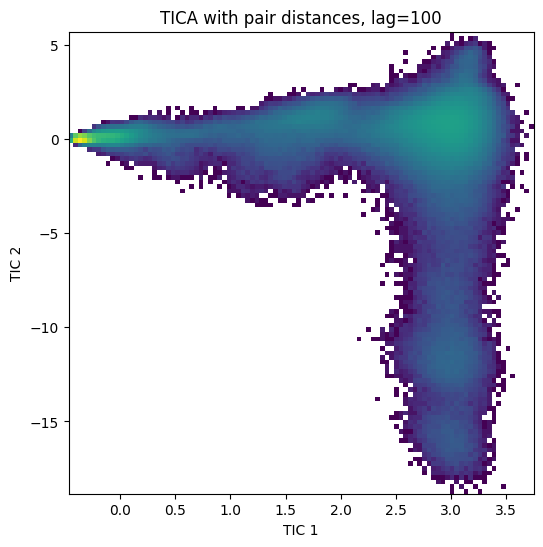

Loading trajectories: 100%|██████████| 557/557 [01:29<00:00,  6.23it/s]


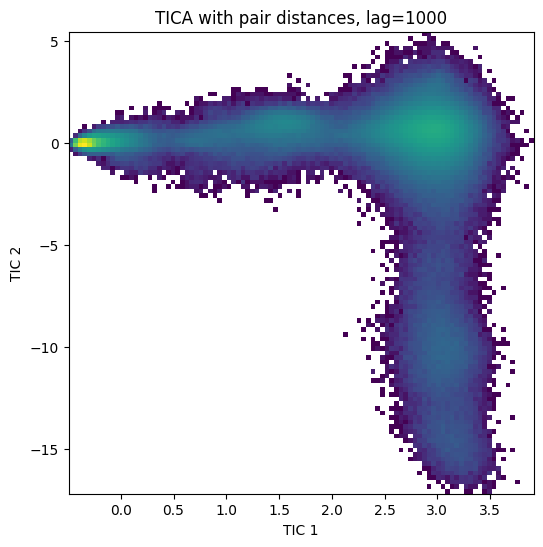

In [11]:
# TICA with pair distances
ca_resid_pair = np.array(
	[(a.index, b.index) for a, b in combinations(list(pdb_traj.topology.residues), 2)]
)

for lag in (10, 100, 1000):
	tica_model_path = f"/home/shpark/prj-mlcv/lib/DESRES/data/NTL9/NTL9_tica_model_lag{lag}.pkl"
	tica_model = pickle.load(open(tica_model_path, 'rb'))
	tica_coord_path = f"/home/shpark/prj-mlcv/lib/DESRES/data/NTL9/NTL9_tica_coord_lag{lag}.npy"
	if os.path.exists(tica_coord_path):
		tica_data = np.load(tica_coord_path)
		x = tica_data[:, 0]
		y = tica_data[:, 1]
	else:
		tica_coords = []
		for i in tqdm(
			file_indices,
			desc="Loading trajectories"
		):
			file_idx = f"{i:03d}"
			file_path = f"{base_dir}/{molecule}-{simulation_idx}-protein-{file_idx}-aligned.dcd"
			traj = md.load_dcd(file_path, top=pdb_path)
			ca_pair_contacts, _ = md.compute_contacts(traj, scheme="ca", contacts=ca_resid_pair, periodic=False)
			tica_data = tica_model.transform(ca_pair_contacts)
			tica_coords.append(tica_data)
		tica_data = np.concatenate(tica_coords, axis=0)
		np.save(tica_coord_path, tica_data)
		x = tica_data[:, 0]
		y = tica_data[:, 1]

	# Plot
	fig = plt.figure(figsize=(6, 6))
	ax = fig.add_subplot(111)
	ax.hist2d(x, y, bins=100, norm=LogNorm())
	ax.set_xlabel("TIC 1")
	ax.set_ylabel("TIC 2")
	plt.title(f"TICA with pair distances, lag={lag}")
	plt.savefig(f'../data/{molecule}/{molecule}_tica_model_lag{lag}.png')
	plt.show()
	plt.close()

	# tica_model_path = f"../data/{molecule}/{molecule}_tica_model_lag{lag}.pkl"
	# if not os.path.exists(tica_model_path):
	# 	with open(tica_model_path, 'wb') as f:
	# 		pickle.dump(tica_obj, f)

In [ ]:
lag = 10
tica_coord_path = f"../data/{molecule}/{molecule}_tica_coord_lag{lag}.npy"
tica_coord_loaded = np.load(tica_coord_path)
print(tica_coord_loaded.shape)

# Analysis

## States by RMSD

In [10]:
def rmsd_to_refpdb(
	traj: md.Trajectory,
	reference_traj: md.Trajectory,
	atom_type: str = "ca",
) -> np.ndarray:
	"""
	Generate binary labels for folded/unfolded states based on RMSD
	"""
	if atom_type == "ca":
		atom_indices = traj.topology.select("name CA")
	else:
		atom_indices = None
	
	rmsd = md.rmsd(
		target = traj,
		reference = reference_traj,
		atom_indices = atom_indices
	)
	return rmsd

### Folded

0.19928907


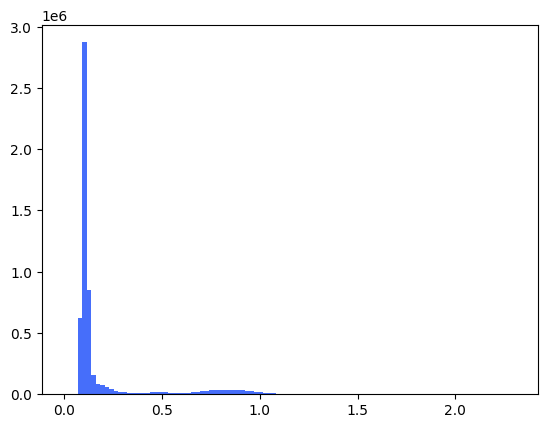

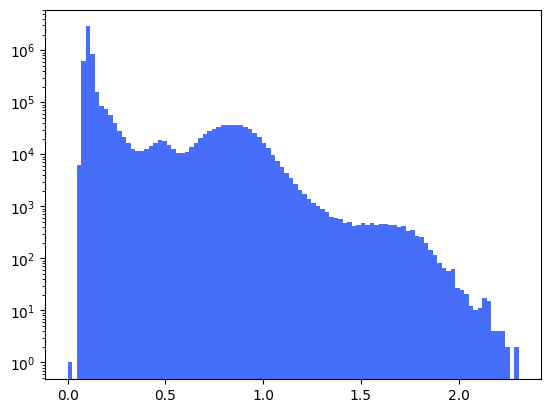

In [60]:
selected_frame = all_traj[5246075]
rmsd_to_folded = rmsd_to_refpdb(
    traj = all_traj,
    reference_traj = selected_frame,
)

print(rmsd_to_folded.mean())
plt.hist(
    rmsd_to_folded,
    bins=100,
    # log=True,
    color=blue,
)
plt.show()

plt.hist(
    rmsd_to_folded,
    bins=100,
    log=True,
    color=blue,
)
plt.show()

In [55]:
dssp_selected = md.compute_dssp(selected_frame)
print(dssp_selected.shape)
print(dssp_selected[0])
view_selected = nv.show_mdtraj(selected_frame)
view_selected.add_representation("licorice", selection="protein")
view_selected

(1, 39)
['C' 'E' 'E' 'E' 'E' 'C' 'C' 'C' 'H' 'H' 'H' 'C' 'C' 'C' 'C' 'C' 'C' 'E'
 'E' 'E' 'C' 'C' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'C' 'C' 'C' 'C' 'C' 'C' 'E'
 'E' 'E' 'C']


NGLWidget()

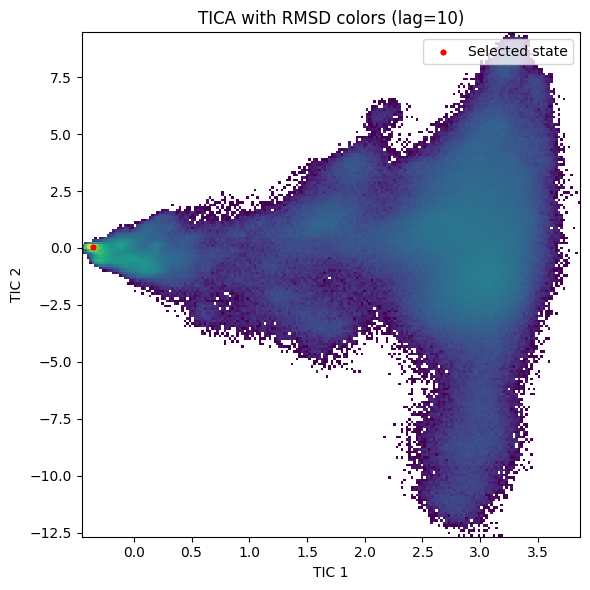

In [56]:
# pdb on TICA plot
lag = 10

ca_resid_pair = np.array(
	[(a.index, b.index) for a, b in combinations(list(all_traj.topology.residues), 2)]
)
selected_ca_pair_distances, resid_pairs = md.compute_contacts(
	selected_frame, scheme="ca", contacts=ca_resid_pair, periodic=False
)
tica_model_path = f"../data/{molecule}/{molecule}_tica_model_lag{lag}.pkl"
tica_model = pickle.load(open(tica_model_path, 'rb'))
tica_data_selected = tica_model.transform(selected_ca_pair_distances)
x_tica_selected = tica_data_selected[:, 0]
y_tica_selected = tica_data_selected[:, 1]

tica_coord_path = f"../data/{molecule}/{molecule}_tica_coord_lag{lag}.npy"
tica_data = np.load(tica_coord_path)
x = tica_data[:, 0]
y = tica_data[:, 1]

# Plot TICA with RMSD colors
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.hist2d(x, y, bins=200, norm=LogNorm())
ax.scatter(
    x_tica_selected,
    y_tica_selected,
    c="red",
    s=20,
    edgecolors="k",
    linewidths=0,
    label="Selected state",
)
ax.set_xlabel("TIC 1")
ax.set_ylabel("TIC 2")
ax.set_title(f"TICA with RMSD colors (lag={lag})")
ax.legend(loc="best")
plt.tight_layout()
plt.show()
plt.close()


In [57]:
rmsd_threshold = 0.5
save_dir = f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein"

selected_frame.save_pdb(
	f"/home/shpark/prj-mlcv/lib/bioemu/opes/data/{molecule}/folded.pdb"
)
torch.save(
    torch.from_numpy(rmsd_to_folded),
    f"{save_dir}/{molecule}-{simulation_idx}-rmsd.pt"
)
torch.save(
    torch.from_numpy(rmsd_to_folded < rmsd_threshold),
    f"{save_dir}/{molecule}-{simulation_idx}-label-rmsd-folded.pt"
)

### Unfolded

In [65]:
np.argwhere((rmsd_to_folded > 0.97) & (rmsd_to_folded < 1.03))

array([[      1],
       [     19],
       [     22],
       ...,
       [5212612],
       [5212657],
       [5212658]], shape=(46145, 1))

0.9214001


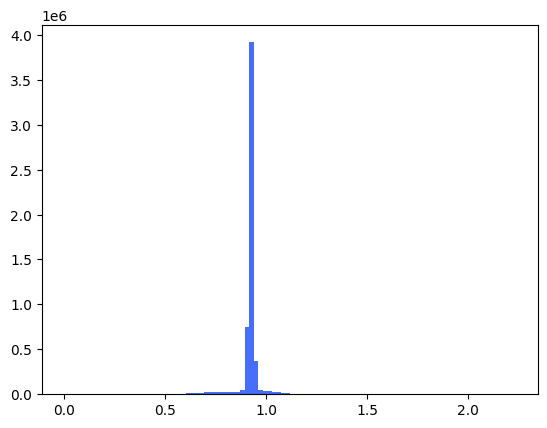

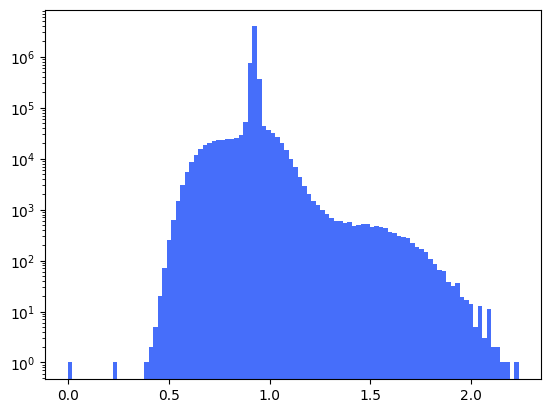

In [66]:
unfolded_selected_frame = all_traj[0]
unfolded_selected_rmsd = rmsd_to_refpdb(
    traj = all_traj,
    reference_traj = unfolded_selected_frame,
)

print(unfolded_selected_rmsd.mean())
plt.hist(
    unfolded_selected_rmsd,
    bins=100,
    # log=True,
    color=blue,
)
plt.show()

plt.hist(
    unfolded_selected_rmsd,
    bins=100,
    log=True,
    color=blue,
)
plt.show()

In [67]:
unfolded_dssp_selected = md.compute_dssp(unfolded_selected_frame)
print(unfolded_dssp_selected.shape)
print(unfolded_dssp_selected[0])
unfolded_selected_view = nv.show_mdtraj(unfolded_selected_frame)
unfolded_selected_view.add_representation("licorice", selection="protein")
unfolded_selected_view

(1, 39)
['C' 'C' 'C' 'C' 'C' 'H' 'H' 'H' 'H' 'H' 'H' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'E' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'E' 'E' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C']


NGLWidget()

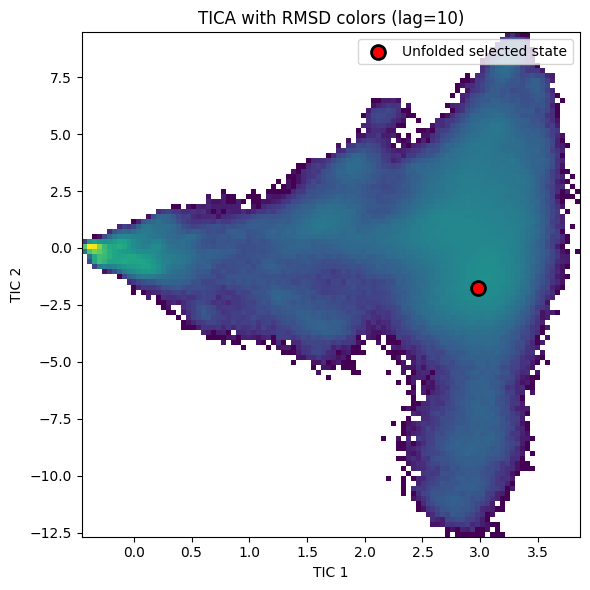

In [69]:
# pdb on TICA plot
lag = 10

ca_resid_pair = np.array(
	[(a.index, b.index) for a, b in combinations(list(all_traj.topology.residues), 2)]
)
unfolded_ca_pair_distances, resid_pairs = md.compute_contacts(
	unfolded_selected_frame, scheme="ca", contacts=ca_resid_pair, periodic=False
)
tica_model_path = f"../data/{molecule}/{molecule}_tica_model_lag{lag}.pkl"
tica_model = pickle.load(open(tica_model_path, 'rb'))
tica_data_selected = tica_model.transform(unfolded_ca_pair_distances)
x_tica_selected = tica_data_selected[:, 0]
y_tica_selected = tica_data_selected[:, 1]

tica_coord_path = f"../data/{molecule}/{molecule}_tica_coord_lag{lag}.npy"
tica_data = np.load(tica_coord_path)
x = tica_data[:, 0]
y = tica_data[:, 1]

# Plot TICA with RMSD colors
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.hist2d(x, y, bins=100, norm=LogNorm())
ax.scatter(
    x_tica_selected,
    y_tica_selected,
    c="red",
    s=100,
    edgecolors="k",
    linewidths=2,
    label="Unfolded selected state",
)
ax.set_xlabel("TIC 1")
ax.set_ylabel("TIC 2")
ax.set_title(f"TICA with RMSD colors (lag={lag})")
ax.legend(loc="best")
plt.tight_layout()
plt.show()
plt.close()


In [70]:
save_dir = f"/home/shpark/prj-mlcv/lib/DESRES/DESRES-Trajectory_{molecule}-{simulation_idx}-protein"

unfolded_selected_frame.save_pdb(
	f"/home/shpark/prj-mlcv/lib/bioemu/opes/data/{molecule}/unfolded.pdb"
)
torch.save(
    torch.from_numpy(unfolded_selected_rmsd),
    f"{save_dir}/{molecule}-{simulation_idx}-rmsd_unfolded.pt"
)

# Conclusion